In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

# import sklearn.datasets
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from pandas import DataFrame
# from scipy.stats import norm
# from matplotlib.colors import ListedColormap


plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# !cat Cleaned_Scheil_Data.csv
# pd.read_table?

In [5]:
# Step 1. Load the file into a pandas dataframe
CleanTab = pd.read_table('Cleaned_Scheil_Data.csv', sep=',',index_col='Ser No.')
CleanTab

,Al,Ti,V,Cr,Mn,Fe,Ni,Cu,Nb,Mo,Tot Vol Frac BCC,Tot Vol Frac FCC,Tot Vol Frac BCC+FCC,Tot Vol Frac Other,Liquidus,Term. Temp,Solidifcation Range
Ser No.,,,,,,,,,,,,,,,,,
1,0.000100,11.111100,11.111100,11.111100,11.111100,11.111100,11.111100,11.111100,11.111100,11.111100,0.541739,0.161854,0.703593,0.296407,1616.61,827.40,789.21
2,1.250000,10.972222,10.972222,10.972222,10.972222,10.972222,10.972222,10.972222,10.972222,10.972222,0.598617,0.140155,0.738772,0.261228,1613.62,827.38,786.24
3,2.500000,10.833333,10.833333,10.833333,10.833333,10.833333,10.833333,10.833333,10.833333,10.833333,0.684441,0.152523,0.836964,0.163036,1610.22,828.66,781.56
4,3.750000,10.694444,10.694444,10.694444,10.694444,10.694444,10.694444,10.694444,10.694444,10.694444,0.713814,0.133392,0.847206,0.152794,1606.43,816.06,790.37
5,5.000000,10.555556,10.555556,10.555556,10.555556,10.555556,10.555556,10.555556,10.555556,10.555556,0.727180,0.116059,0.843239,0.156761,1602.27,793.04,809.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,6.111111,6.111111,6.111111,6.111111,6.111111,6.111111,6.111111,6.111111,6.111111,45.000000,0.588238,0.085602,0.673840,0.326160,2000.97,815.51,1185.46
419,5.972222,5.972222,5.972222,5.972222,5.972222,5.972222,5.972222,5.972222,5.972222,46.250000,0.558254,0.085430,0.643683,0.356317,2000.97,821.23,1179.74
420,5.833333,5.833333,5.833333,5.833333,5.833333,5.833333,5.833333,5.833333,5.833333,47.500000,0.532488,0.083635,0.616123,0.383877,2000.97,827.40,1173.57


In [7]:
CleanTab_rounded = CleanTab.round(2)
CleanTab_rounded

,Al,Ti,V,Cr,Mn,Fe,Ni,Cu,Nb,Mo,Tot Vol Frac BCC,Tot Vol Frac FCC,Tot Vol Frac BCC+FCC,Tot Vol Frac Other,Liquidus,Term. Temp,Solidifcation Range
Ser No.,,,,,,,,,,,,,,,,,
1,0.00,11.11,11.11,11.11,11.11,11.11,11.11,11.11,11.11,11.11,0.54,0.16,0.70,0.30,1616.61,827.40,789.21
2,1.25,10.97,10.97,10.97,10.97,10.97,10.97,10.97,10.97,10.97,0.60,0.14,0.74,0.26,1613.62,827.38,786.24
3,2.50,10.83,10.83,10.83,10.83,10.83,10.83,10.83,10.83,10.83,0.68,0.15,0.84,0.16,1610.22,828.66,781.56
4,3.75,10.69,10.69,10.69,10.69,10.69,10.69,10.69,10.69,10.69,0.71,0.13,0.85,0.15,1606.43,816.06,790.37
5,5.00,10.56,10.56,10.56,10.56,10.56,10.56,10.56,10.56,10.56,0.73,0.12,0.84,0.16,1602.27,793.04,809.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,6.11,6.11,6.11,6.11,6.11,6.11,6.11,6.11,6.11,45.00,0.59,0.09,0.67,0.33,2000.97,815.51,1185.46
419,5.97,5.97,5.97,5.97,5.97,5.97,5.97,5.97,5.97,46.25,0.56,0.09,0.64,0.36,2000.97,821.23,1179.74
420,5.83,5.83,5.83,5.83,5.83,5.83,5.83,5.83,5.83,47.50,0.53,0.08,0.62,0.38,2000.97,827.40,1173.57


In [8]:
CleanTab_rounded.describe()

,Al,Ti,V,Cr,Mn,Fe,Ni,Cu,Nb,Mo,Tot Vol Frac BCC,Tot Vol Frac FCC,Tot Vol Frac BCC+FCC,Tot Vol Frac Other,Liquidus,Term. Temp,Solidifcation Range
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,419.000000,419.000000,419.000000
mean,9.425213,11.959455,9.826754,9.826754,9.826754,9.826754,9.826754,9.826754,9.826754,9.826754,0.628365,0.113294,0.741517,0.258483,1571.511313,782.325561,789.185728
std,5.922491,11.944125,7.002488,7.002488,7.002488,7.002488,7.002488,7.002488,7.002488,7.002488,0.215969,0.156861,0.163652,0.163652,155.828282,53.787996,184.707200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1139.480000,682.630000,211.710000
25%,6.810000,7.080000,6.810000,6.810000,6.810000,6.810000,6.810000,6.810000,6.810000,6.810000,0.510000,0.050000,0.620000,0.130000,1509.050000,747.640000,716.820000
50%,8.330000,8.750000,8.470000,8.470000,8.470000,8.470000,8.470000,8.470000,8.470000,8.470000,0.640000,0.080000,0.760000,0.240000,1582.480000,764.340000,823.740000
75%,10.000000,10.280000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.807500,0.090000,0.870000,0.380000,1648.345000,806.220000,892.565000
max,45.000000,70.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.950000,0.950000,0.990000,1.000000,2000.970000,936.480000,1247.090000


In [9]:
CleanTab.columns

Index(['Al', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Nb', 'Mo',
       'Tot Vol Frac BCC', 'Tot Vol Frac FCC', 'Tot Vol Frac BCC+FCC',
       'Tot Vol Frac Other', 'Liquidus', 'Term. Temp', 'Solidifcation Range'],
      dtype='object')

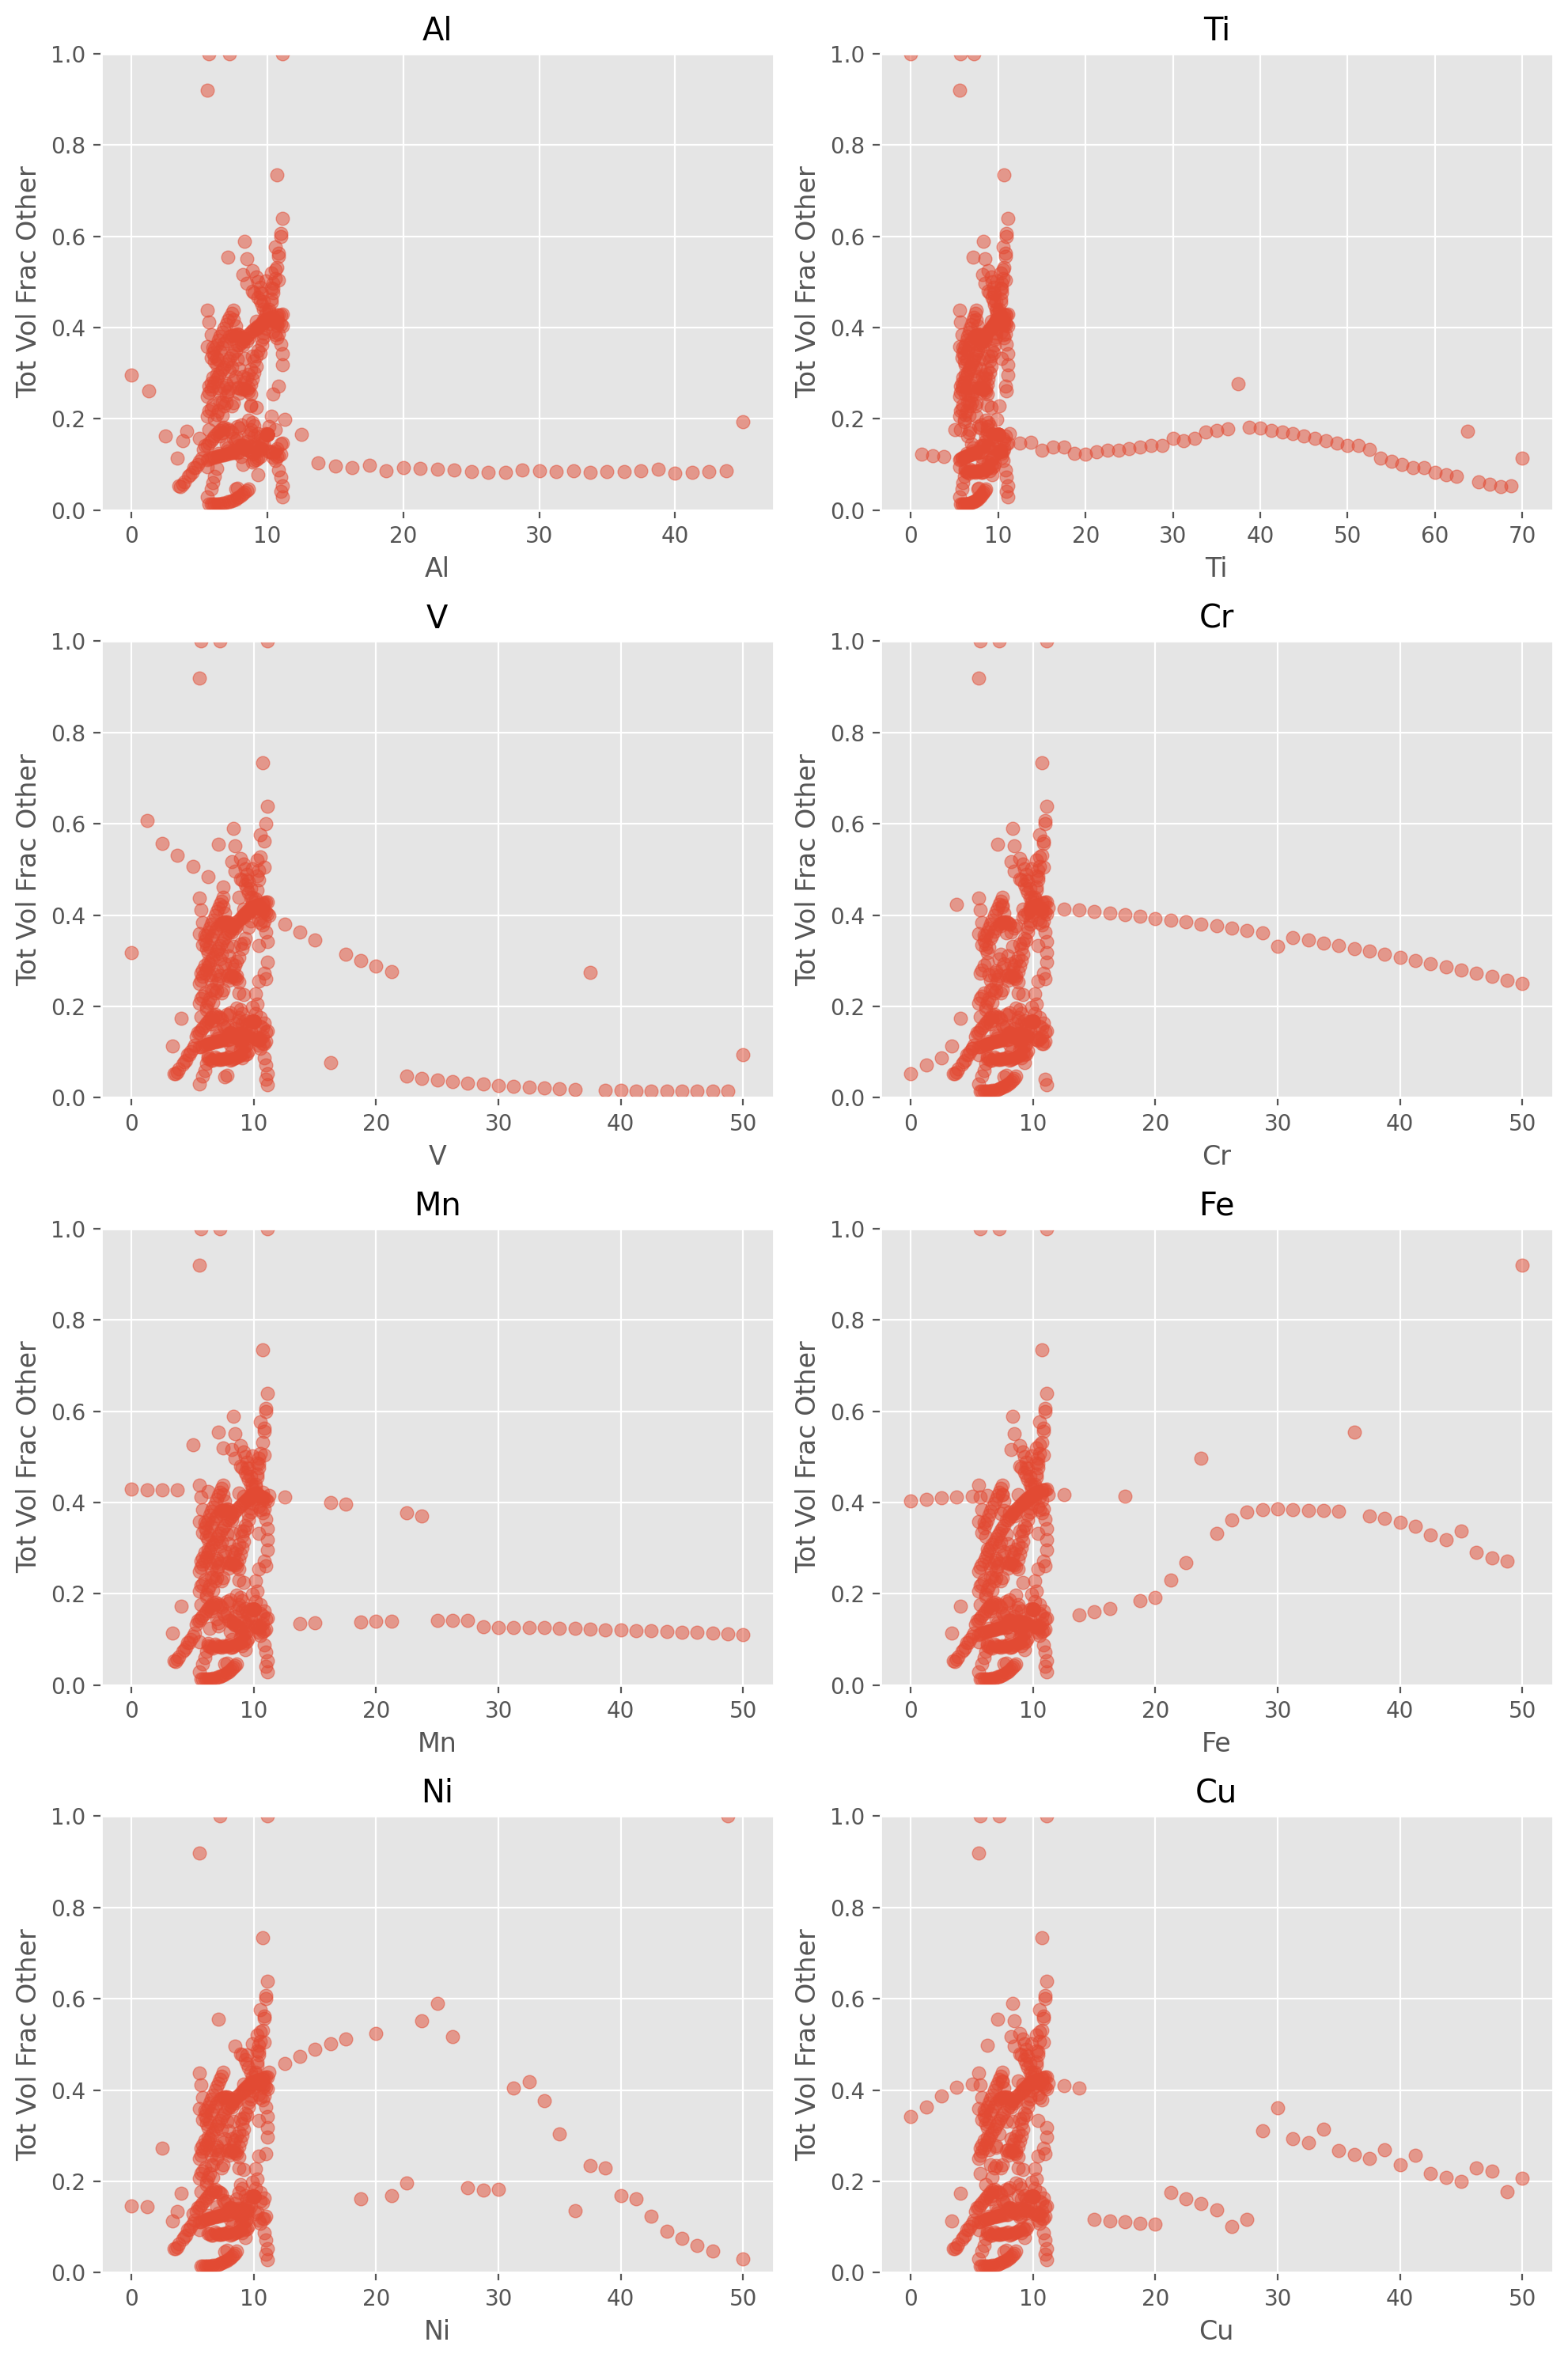

In [17]:
# Get column names
columns = ['Al', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Nb', 'Mo']
y_val = CleanTab['Tot Vol Frac Other']
ylabel = 'Tot Vol Frac Other'

# Create figure with subplots and change the size to look good
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Iterate over the actual number of subplots (8 in this case)
for i in range(8):
    row = i // 2  # Determining what row the plot goes in
    col = i % 2   # Determining the column by calculating the remainder
    
    # Create a scatter plot for the current column
    axs[row, col].scatter(CleanTab[columns[i]], y_val, alpha=0.5, label=columns[i])
    axs[row, col].set_xlabel(columns[i])  # Use the column name as x-axis label
    axs[row, col].set_ylabel(ylabel)
    axs[row, col].set_title(columns[i])
    
    # Set y-axis limits
    axs[row, col].set_ylim(0, 1)  # Adjust these values as needed

# Make it tight!
plt.tight_layout()

# Show the plot
plt.show()


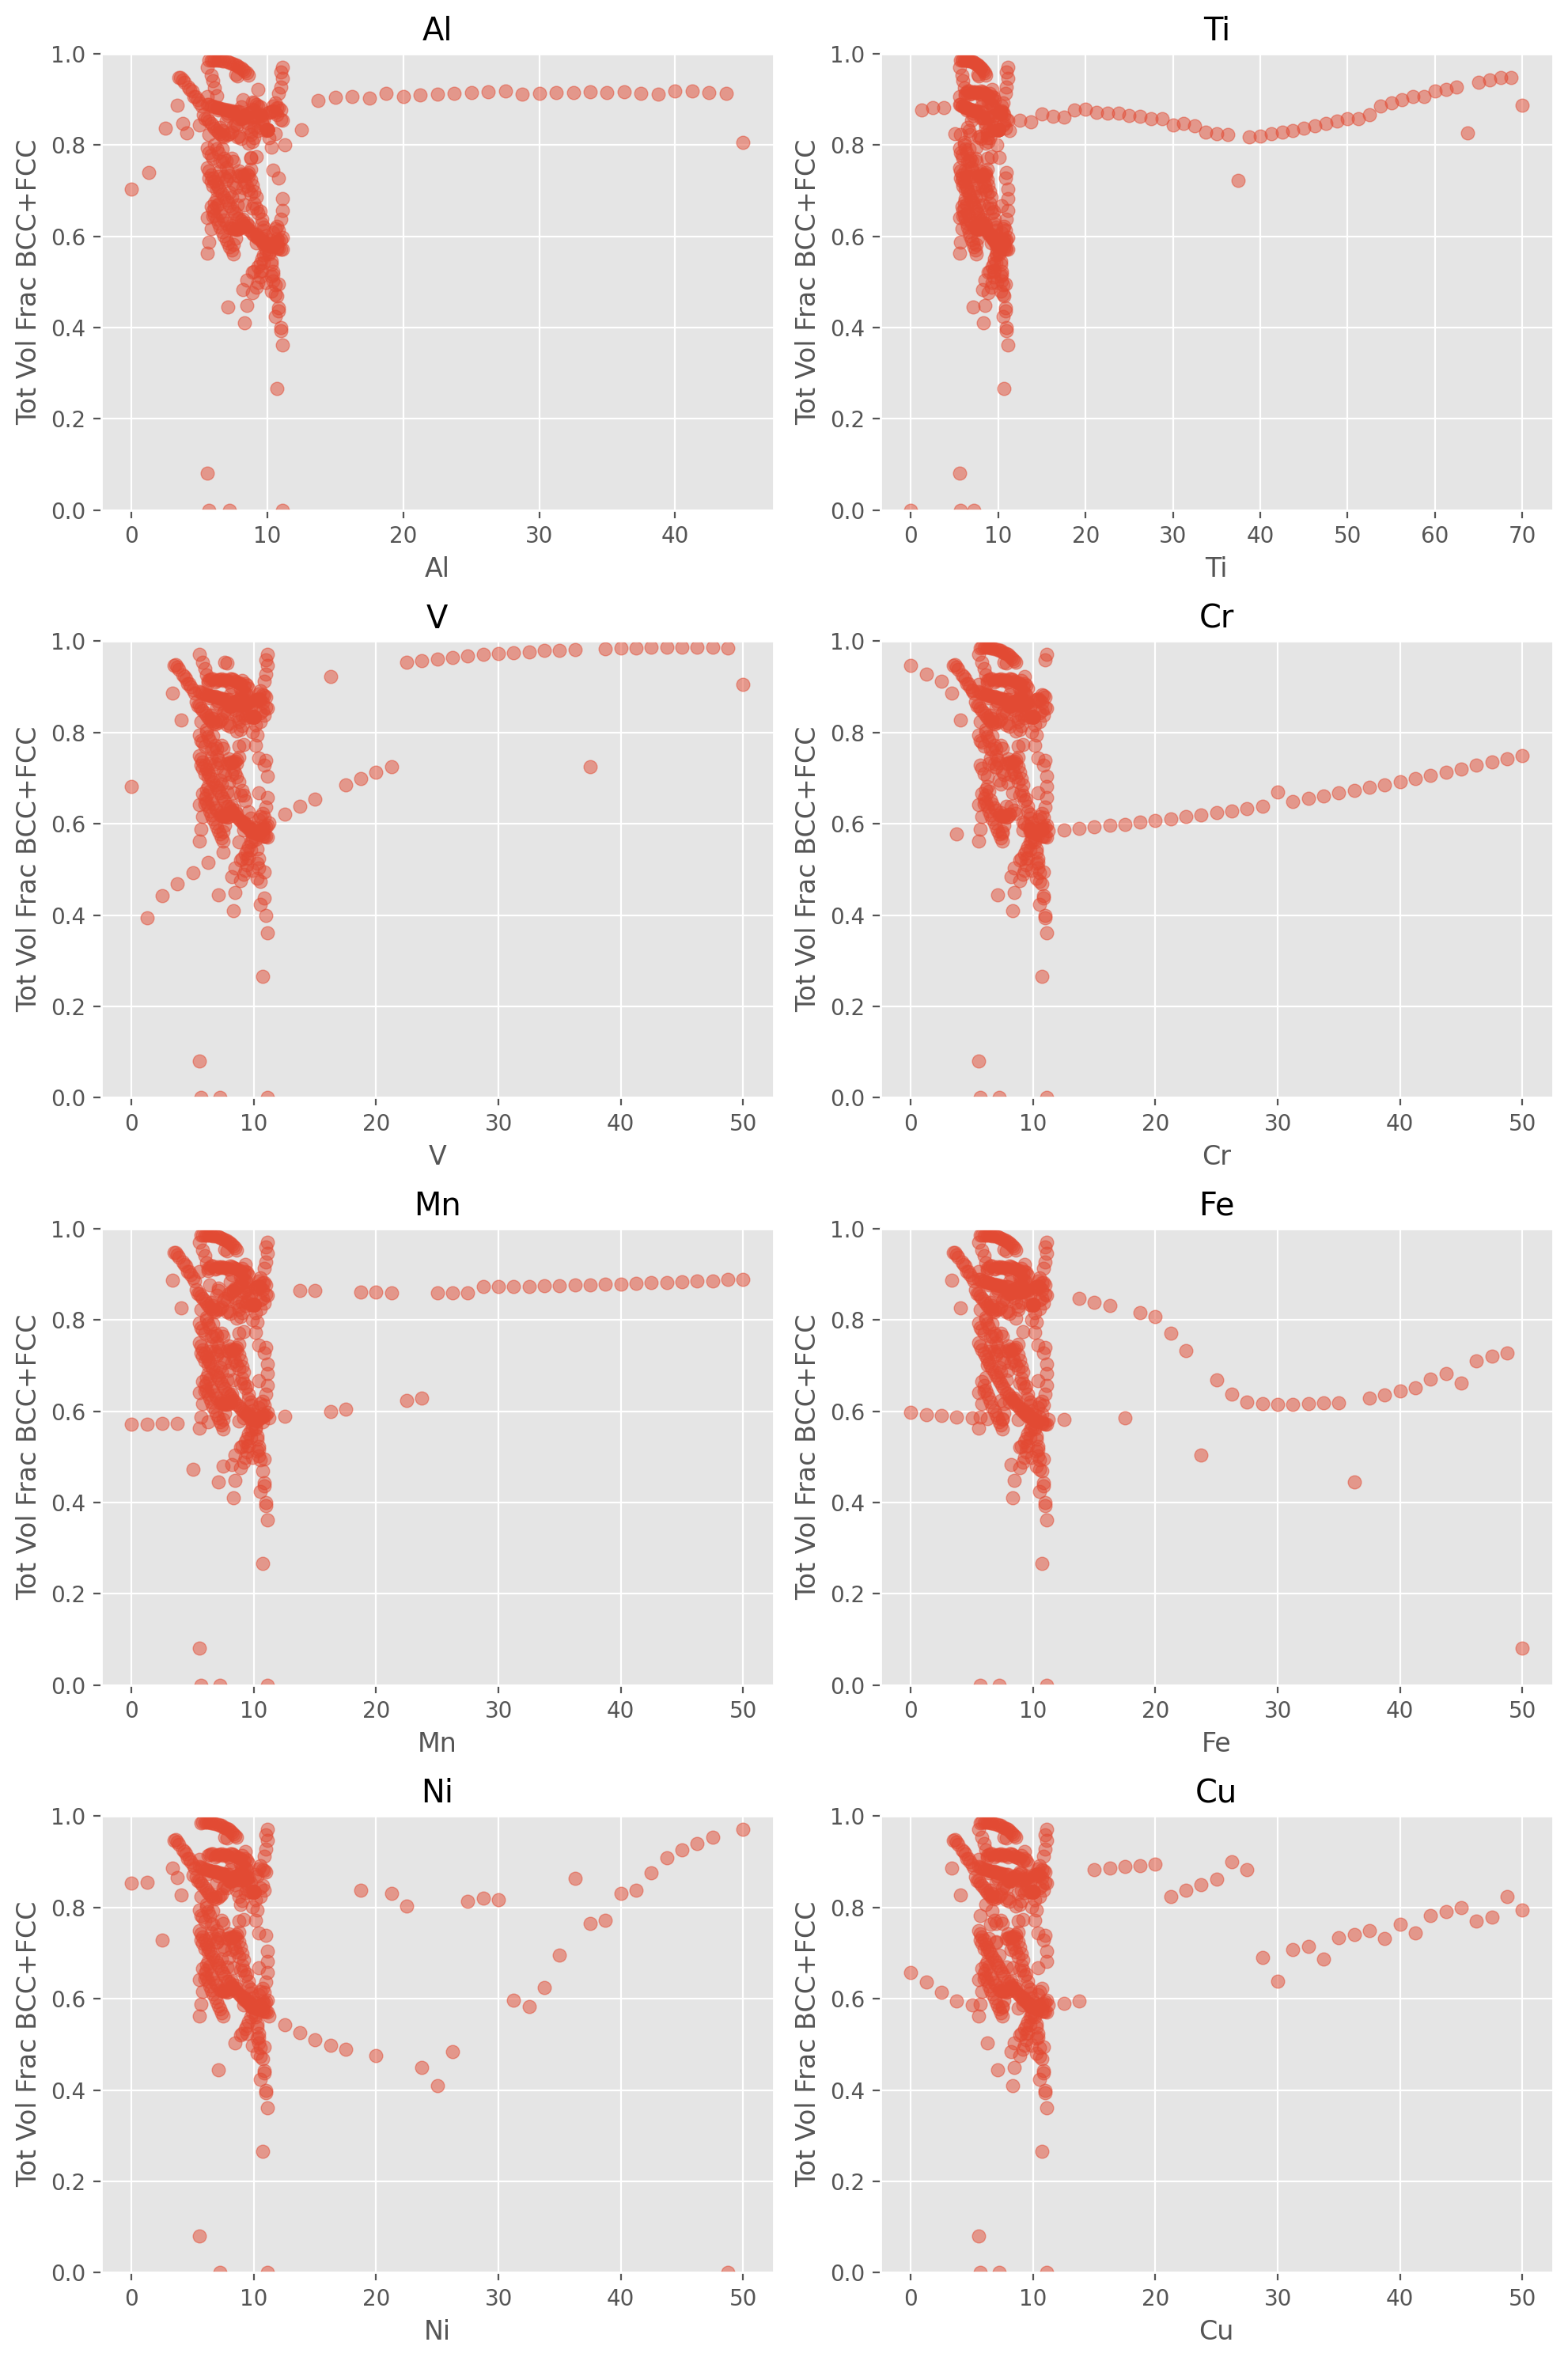

In [18]:
# Get column names
columns = ['Al', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Nb', 'Mo']
y_val = CleanTab['Tot Vol Frac BCC+FCC']
ylabel = 'Tot Vol Frac BCC+FCC'

# Create figure with subplots and change the size to look good
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Iterate over the actual number of subplots (8 in this case)
for i in range(8):
    row = i // 2  # Determining what row the plot goes in
    col = i % 2   # Determining the column by calculating the remainder
    
    # Create a scatter plot for the current column
    axs[row, col].scatter(CleanTab[columns[i]], y_val, alpha=0.5, label=columns[i])
    axs[row, col].set_xlabel(columns[i])  # Use the column name as x-axis label
    axs[row, col].set_ylabel(ylabel)
    axs[row, col].set_title(columns[i])
    
    # Set y-axis limits
    axs[row, col].set_ylim(0, 1)  # Adjust these values as needed

# Make it tight!
plt.tight_layout()

# Show the plot
plt.show()


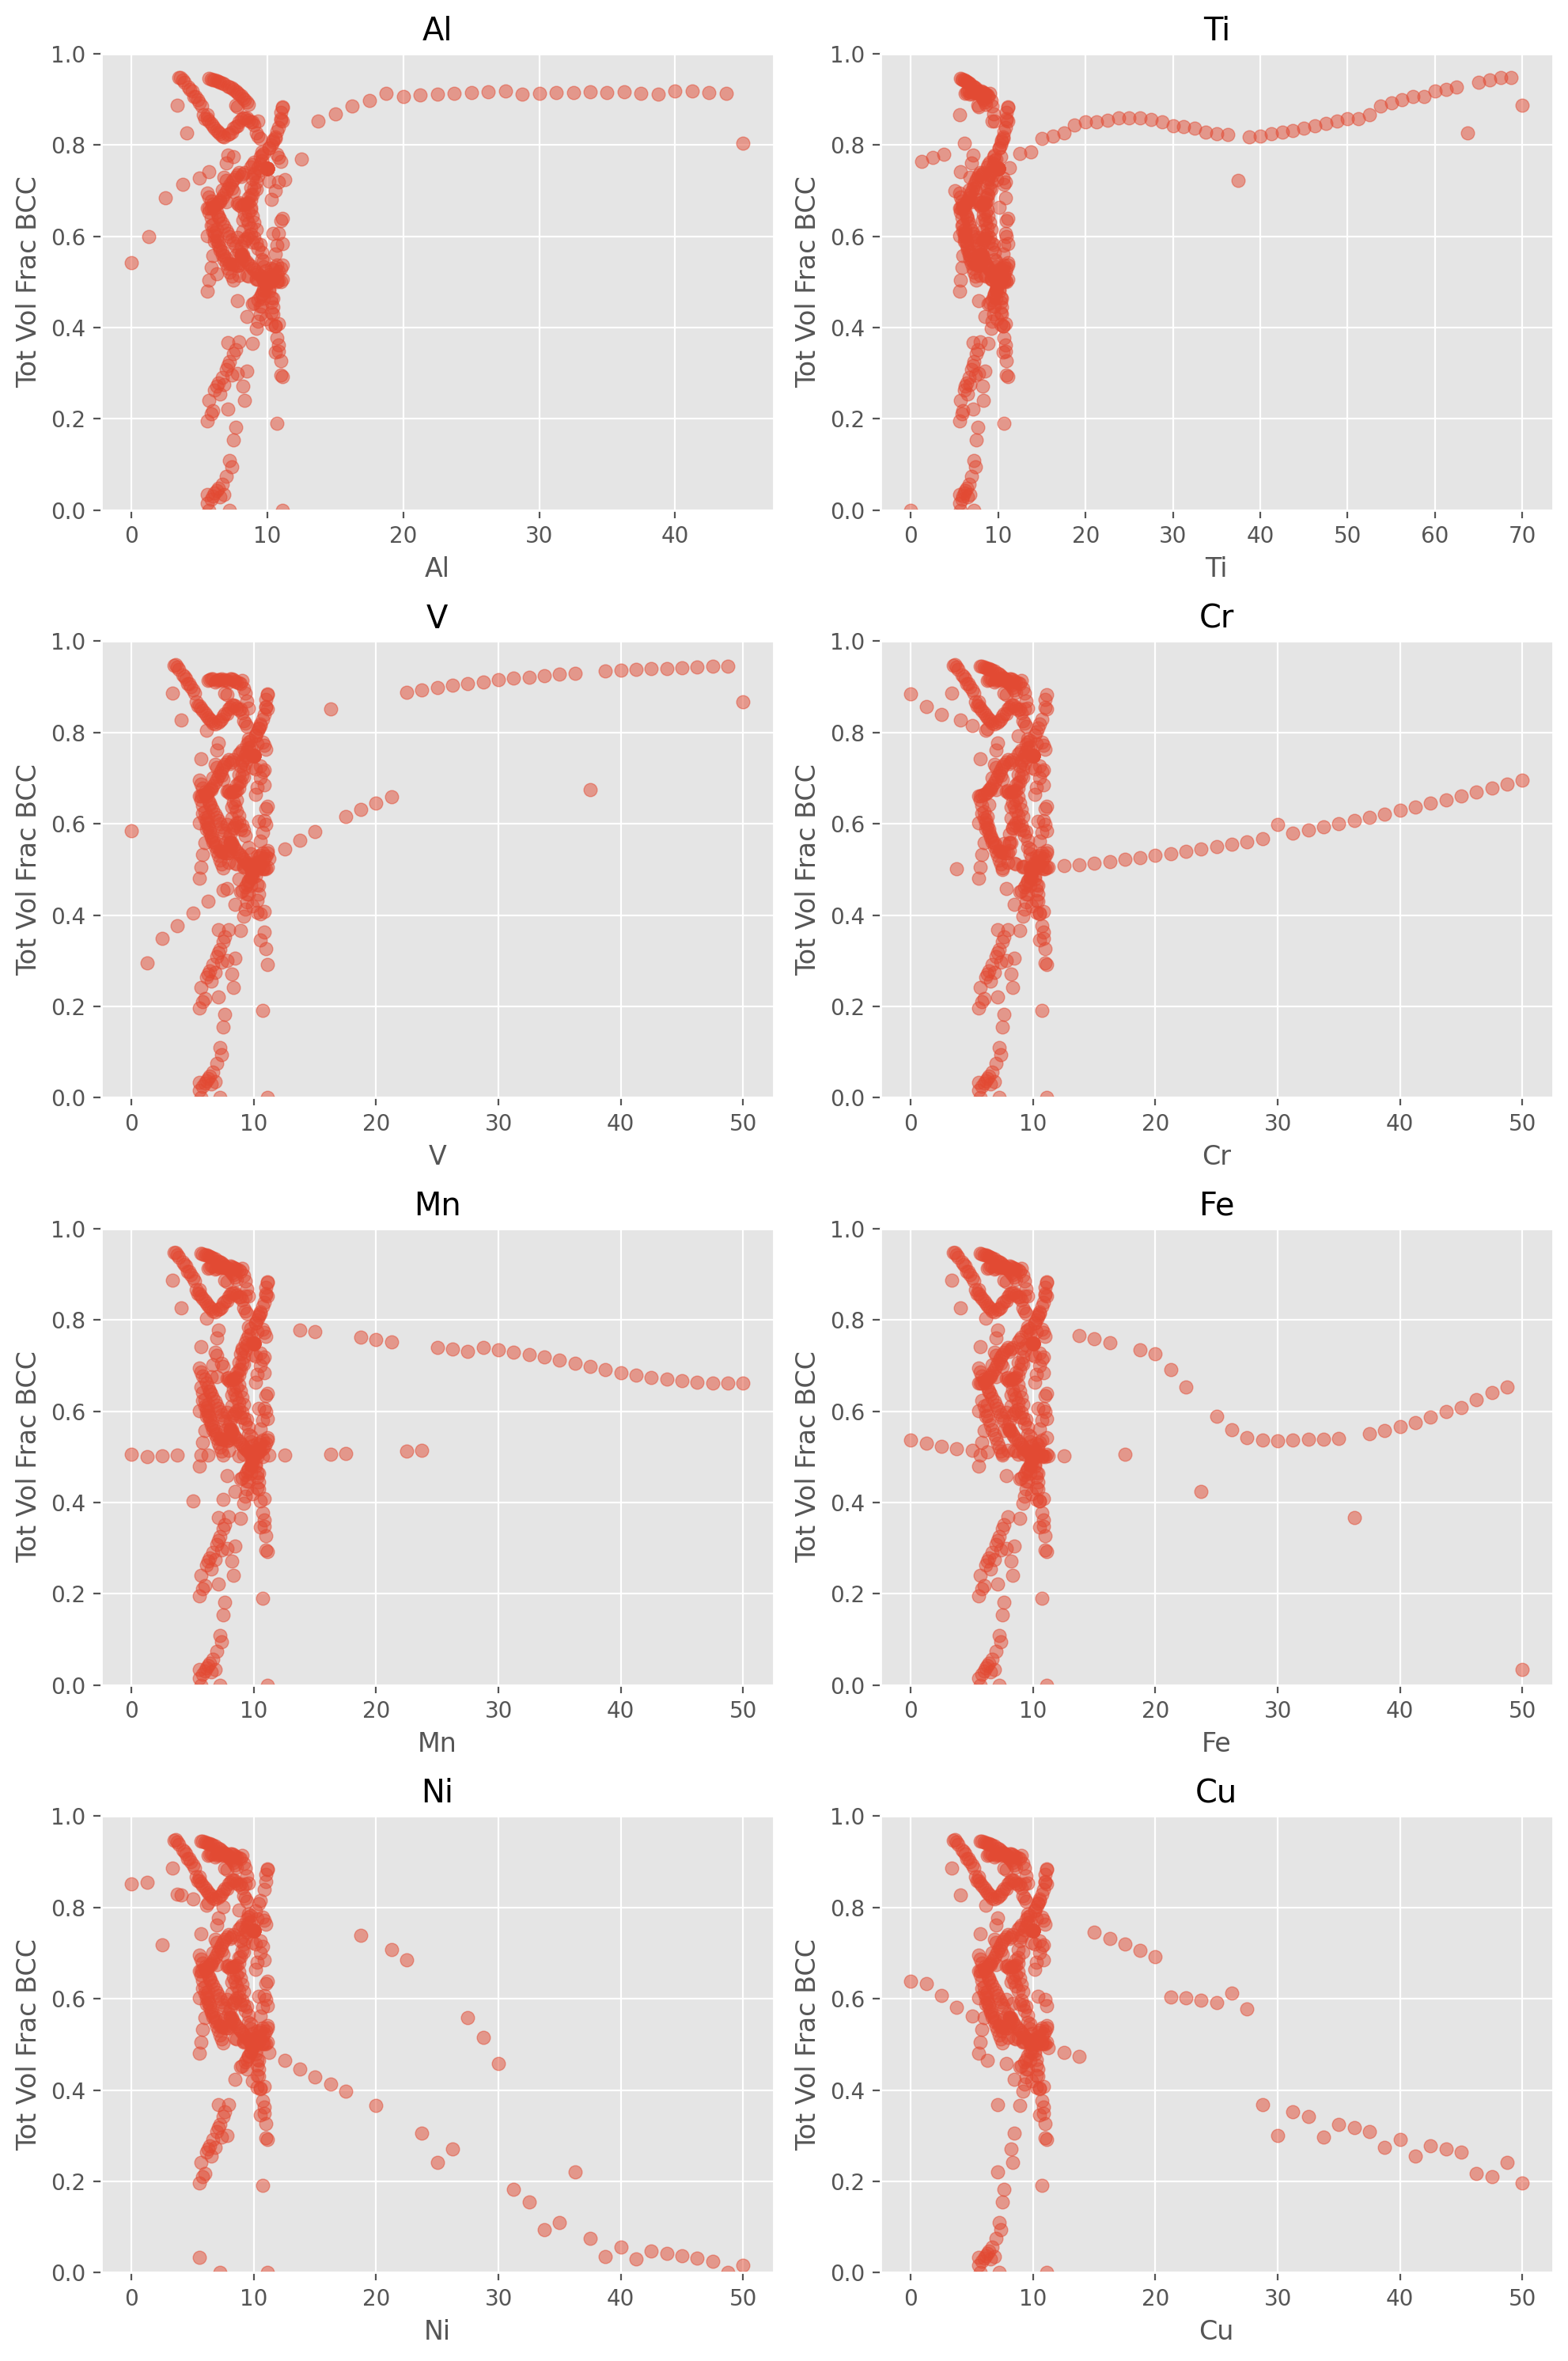

In [19]:
# Get column names
columns = ['Al', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Nb', 'Mo']
y_val = CleanTab['Tot Vol Frac BCC']
ylabel = 'Tot Vol Frac BCC'

# Create figure with subplots and change the size to look good
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Iterate over the actual number of subplots (8 in this case)
for i in range(8):
    row = i // 2  # Determining what row the plot goes in
    col = i % 2   # Determining the column by calculating the remainder
    
    # Create a scatter plot for the current column
    axs[row, col].scatter(CleanTab[columns[i]], y_val, alpha=0.5, label=columns[i])
    axs[row, col].set_xlabel(columns[i])  # Use the column name as x-axis label
    axs[row, col].set_ylabel(ylabel)
    axs[row, col].set_title(columns[i])
    
    # Set y-axis limits
    axs[row, col].set_ylim(0, 1)  # Adjust these values as needed

# Make it tight!
plt.tight_layout()

# Show the plot
plt.show()


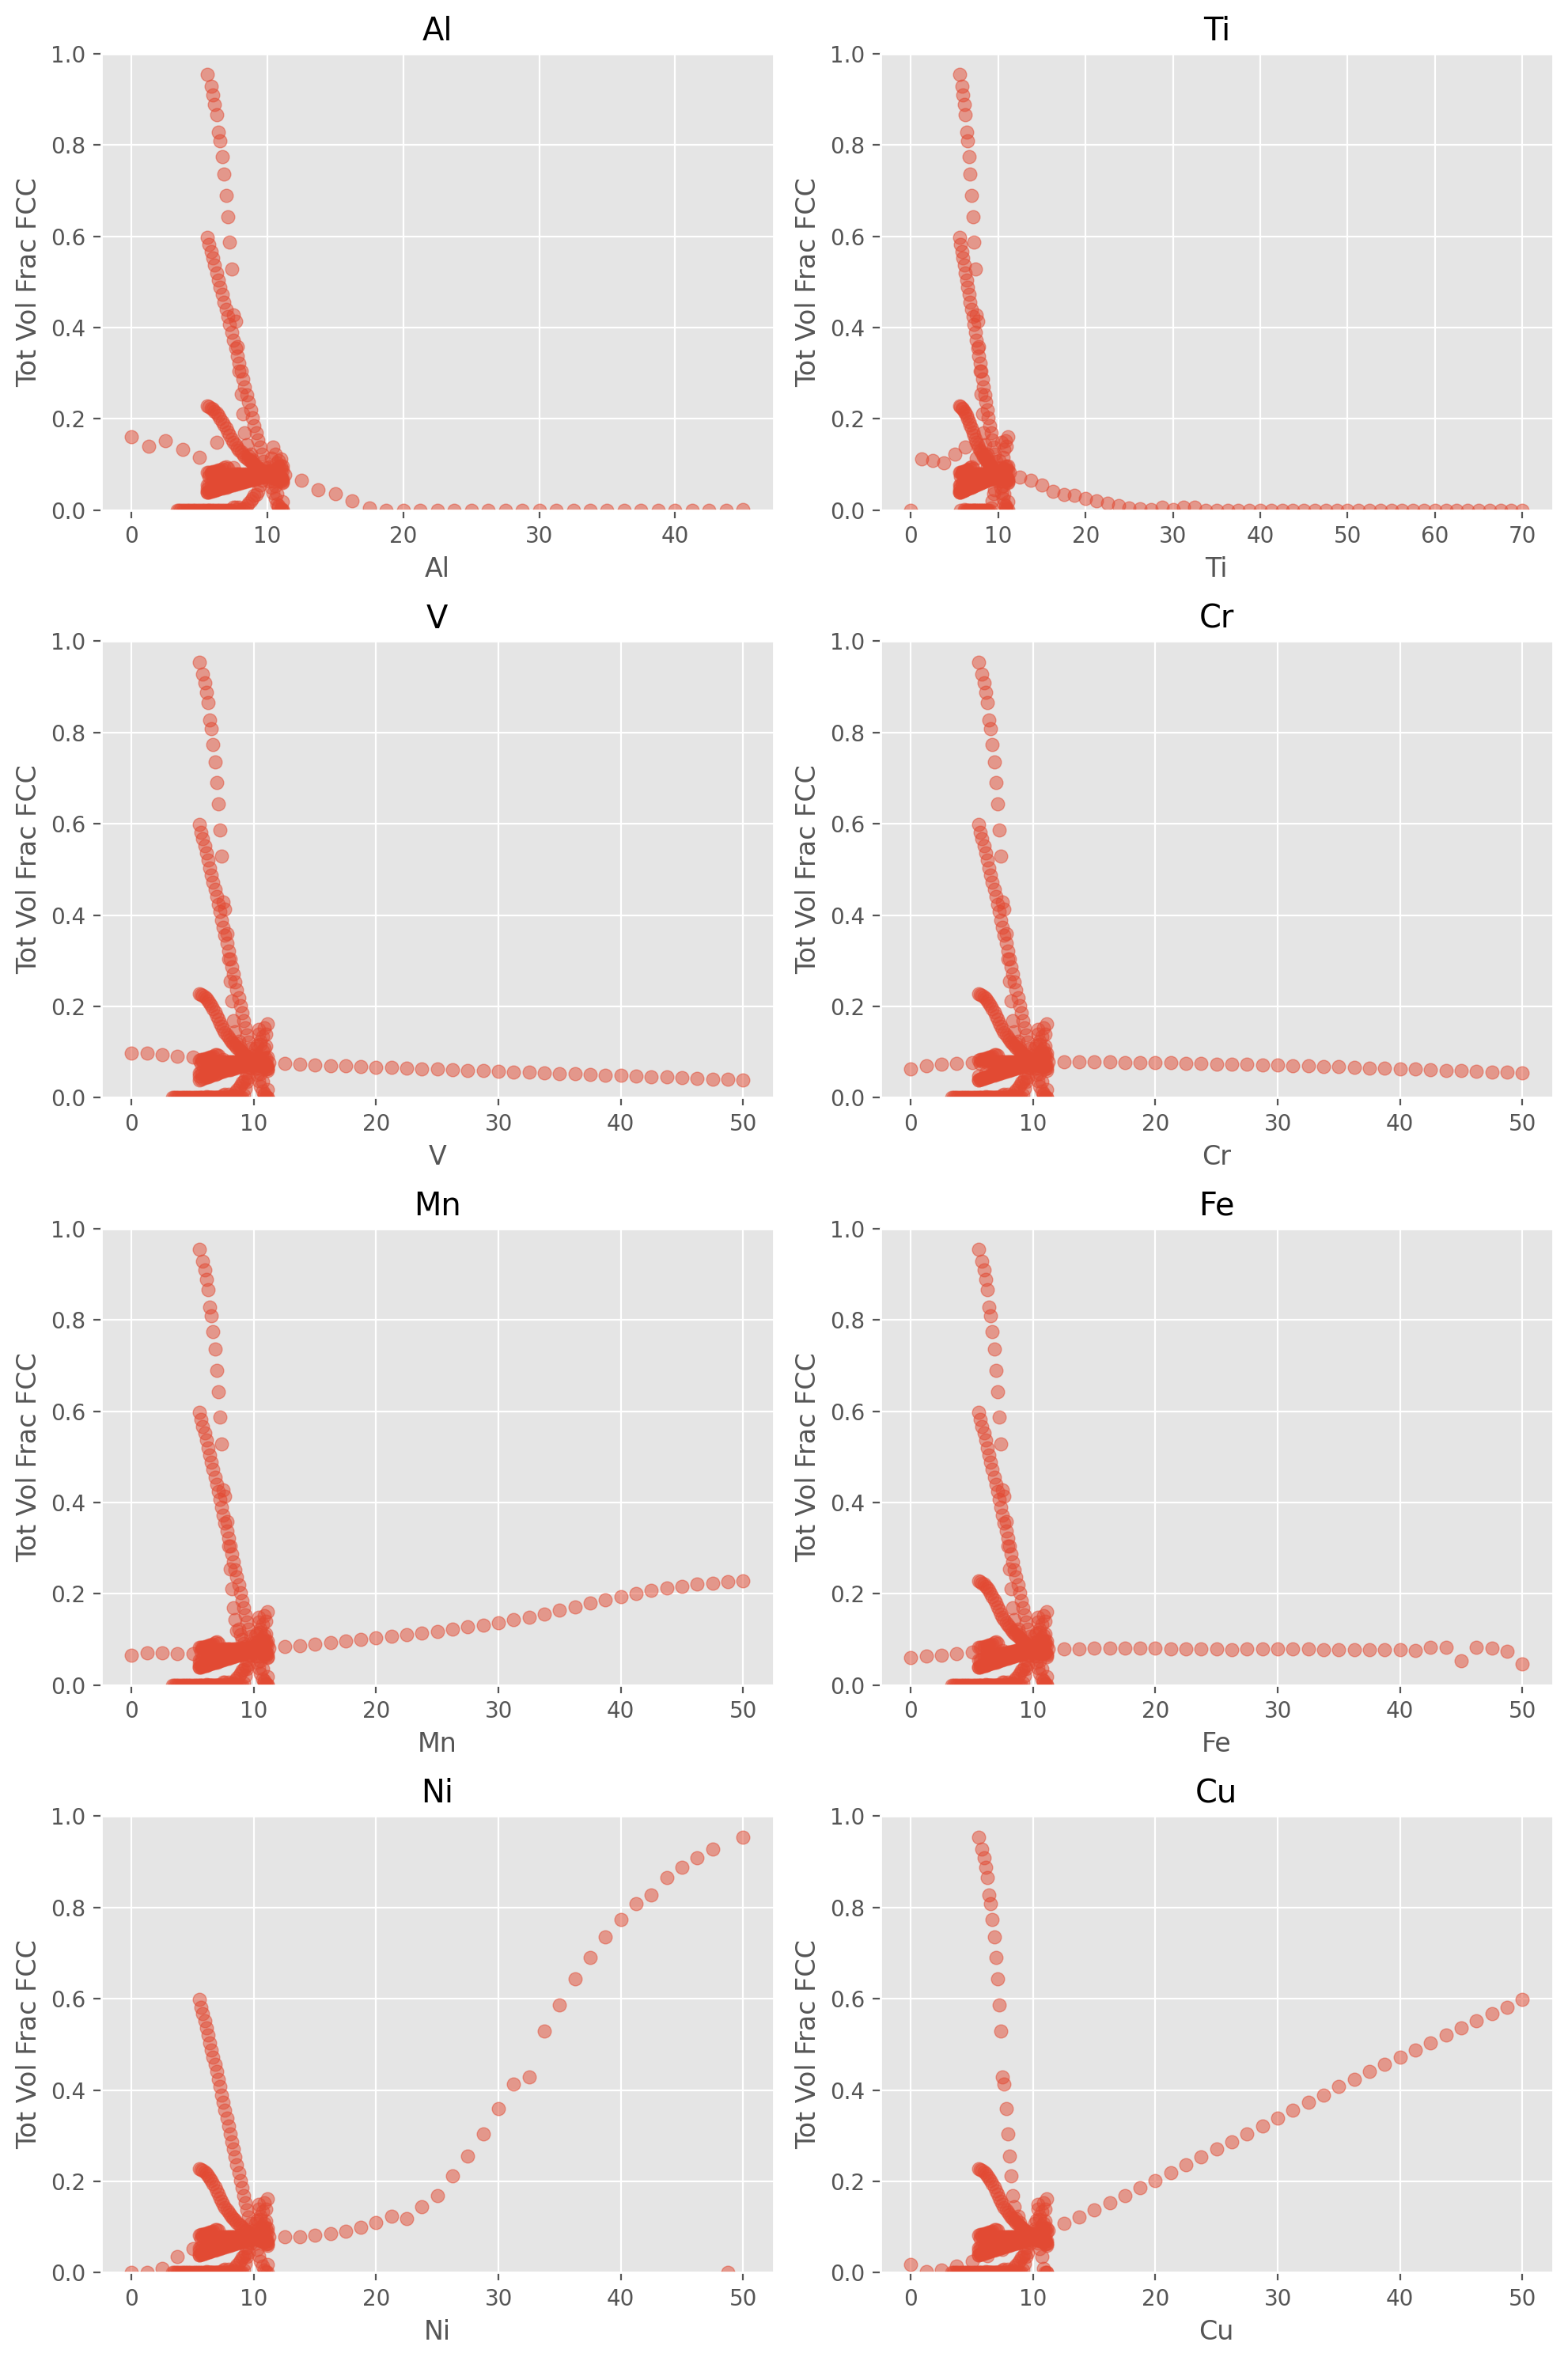

In [20]:
# Get column names
columns = ['Al', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Nb', 'Mo']
y_val = CleanTab['Tot Vol Frac FCC']
ylabel = 'Tot Vol Frac FCC'

# Create figure with subplots and change the size to look good
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Iterate over the actual number of subplots (8 in this case)
for i in range(8):
    row = i // 2  # Determining what row the plot goes in
    col = i % 2   # Determining the column by calculating the remainder
    
    # Create a scatter plot for the current column
    axs[row, col].scatter(CleanTab[columns[i]], y_val, alpha=0.5, label=columns[i])
    axs[row, col].set_xlabel(columns[i])  # Use the column name as x-axis label
    axs[row, col].set_ylabel(ylabel)
    axs[row, col].set_title(columns[i])
    
    # Set y-axis limits
    axs[row, col].set_ylim(0, 1)  # Adjust these values as needed

# Make it tight!
plt.tight_layout()

# Show the plot
plt.show()
